## JobInformatica Assignment

Environment setup and packages installation.

In [1]:
! pip install pandas seaborn statsmodels

In [2]:
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

SEED = 1234

dataset_path = os.path.join('dataset', 'factory.csv')

### Data Preparation

In this section we will load the dataset and analyze it from an overall point of view to understand the kind of data we're dealing with.

In [3]:
energy_consumption_df = pd.read_csv(filepath_or_buffer=dataset_path, sep='\t')
energy_consumption_df.head()

,time_batch,cnc_average_kw,work_stations_average_kw,temp_CNC_1,humidity_CNC_1,temp_CNC_2,humidity_CNC_2,temp_CNC_3,humidity_CNC_3,temp_CNC_4,...,temp_CNC_9,humidity_CNC_9,temp_outside,press_mm_hg_outside,humidity_outside,windspeed_outside,visibility_outside,dewpoint_outside,temp_CNC_10,humidity_CNC_10
0,11-01-2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11-01-2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,11-01-2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,11-01-2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,11-01-2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
energy_consumption_df.columns

Index(['time_batch', 'cnc_average_kw', 'work_stations_average_kw',
       'temp_CNC_1', 'humidity_CNC_1', 'temp_CNC_2', 'humidity_CNC_2',
       'temp_CNC_3', 'humidity_CNC_3', 'temp_CNC_4', 'humidity_CNC_4',
       'temp_CNC_5', 'humidity_CNC_5', 'temp_CNC_6', 'humidity_CNC_6',
       'temp_CNC_7', 'humidity_CNC_7', 'temp_CNC_8', 'humidity_CNC_8',
       'temp_CNC_9', 'humidity_CNC_9', 'temp_outside', 'press_mm_hg_outside',
       'humidity_outside', 'windspeed_outside', 'visibility_outside',
       'dewpoint_outside', 'temp_CNC_10', 'humidity_CNC_10'],
      dtype='object')

In [5]:
energy_consumption_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time_batch                19735 non-null  object 
 1   cnc_average_kw            19735 non-null  int64  
 2   work_stations_average_kw  19735 non-null  int64  
 3   temp_CNC_1                19735 non-null  float64
 4   humidity_CNC_1            19735 non-null  float64
 5   temp_CNC_2                19735 non-null  float64
 6   humidity_CNC_2            19735 non-null  float64
 7   temp_CNC_3                19735 non-null  float64
 8   humidity_CNC_3            19735 non-null  float64
 9   temp_CNC_4                19735 non-null  float64
 10  humidity_CNC_4            19735 non-null  float64
 11  temp_CNC_5                19735 non-null  float64
 12  humidity_CNC_5            19735 non-null  float64
 13  temp_CNC_6                19735 non-null  float64
 14  humidi

In [6]:
energy_consumption_df.describe()

,cnc_average_kw,work_stations_average_kw,temp_CNC_1,humidity_CNC_1,temp_CNC_2,humidity_CNC_2,temp_CNC_3,humidity_CNC_3,temp_CNC_4,humidity_CNC_4,...,temp_CNC_9,humidity_CNC_9,temp_outside,press_mm_hg_outside,humidity_outside,windspeed_outside,visibility_outside,dewpoint_outside,temp_CNC_10,humidity_CNC_10
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


Let's check missing values and duplicated rows.

In [7]:
num_duplicates = energy_consumption_df.duplicated(subset=['time_batch']).sum()

print(f'Number of duplicated records based on dates: {num_duplicates}')

Number of duplicated records based on dates: 0


From the datasets we could assume that there no missing values but we double check.

In [8]:
missing_values_total = energy_consumption_df.isna().sum()

print(f'Number of missing values: {missing_values_total}')
print(f'Total sum: {missing_values_total.sum()}')

Number of missing values: time_batch                  0
cnc_average_kw              0
work_stations_average_kw    0
temp_CNC_1                  0
humidity_CNC_1              0
temp_CNC_2                  0
humidity_CNC_2              0
temp_CNC_3                  0
humidity_CNC_3              0
temp_CNC_4                  0
humidity_CNC_4              0
temp_CNC_5                  0
humidity_CNC_5              0
temp_CNC_6                  0
humidity_CNC_6              0
temp_CNC_7                  0
humidity_CNC_7              0
temp_CNC_8                  0
humidity_CNC_8              0
temp_CNC_9                  0
humidity_CNC_9              0
temp_outside                0
press_mm_hg_outside         0
humidity_outside            0
windspeed_outside           0
visibility_outside          0
dewpoint_outside            0
temp_CNC_10                 0
humidity_CNC_10             0
dtype: int64
Total sum: 0


Convert the date format to datetime to enable handling of the data as a time-series.

In [9]:
energy_consumption_df['date'] = pd.to_datetime(energy_consumption_df['time_batch'], format='%d-%m-%Y %H:%M')
energy_consumption_df[['date']].describe()

,date
count,19735
mean,2016-03-20 05:30:00
min,2016-01-11 17:00:00
25%,2016-02-14 23:15:00
50%,2016-03-20 05:30:00
75%,2016-04-23 11:45:00
max,2016-05-27 18:00:00


We can see that the data spans from 2016-01-11 17:00:00 to 2016-05-27 18:00:00. Let's check that it has a uniform distribution in time. If it has an uniform distribution we should count 19735 10 minutes time intervals between the minimum date and maximum date.

In [10]:
# Extract the max and min dates from the datasets, not the cleanest code but it could change with future 
# versions of pandas
max_date = energy_consumption_df[['date']].max().dt.to_pydatetime().tolist()[0]
min_date = energy_consumption_df[['date']].min().dt.to_pydatetime().tolist()[0]

# Compute the time delta between the initial and the final date
time_difference = max_date - min_date

# Convert the time delta in seconds, then in minutes and finally in 10 minutes deltas
total_minutes = time_difference.total_seconds() / 60
total_10min_deltas = total_minutes / 10

print(f'Expected 10 minutes time intervals: {total_10min_deltas}')

Expected 10 minutes time intervals: 19734.0


/var/folders/ql/3j5kp265003_ty83733q2wt80000gn/T/ipykernel_37054/1473397053.py:3: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  max_date = energy_consumption_df[['date']].max().dt.to_pydatetime().tolist()[0]
/var/folders/ql/3j5kp265003_ty83733q2wt80000gn/T/ipykernel_37054/1473397053.py:4: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  min_date = energy_consumption_df[['date']].min().dt.to_pydatetime().tolist()[0]


The computed time intervals are equivalent to the records of the datasets if we consider that the starting or the ending record are exluded from the computation.

### Data Visualization

Now that we know that the data has a uniform distribution in time, we can plot the time-series and check if they show some patterns.

In [11]:
# Set the date as the dataframe index, execute only once as it will delete the column and 
# make it the dataframe index
energy_consumption_df.set_index('date', inplace=True)

# Drop the 'time_batch' to avoid data handling error due to its object type and since it will be needed no more
energy_consumption_df.drop('time_batch', axis=1, inplace=True)

#### Daily Energy

Considering the long time span contained in dataset, visualizing the entire dataset in the same graph might not display insightful information. In the first steps we try to visualize a couple days of energy consumption comparing the ```cnc_average_kw``` and ```work_station_average_kw```.

<Axes: xlabel='date'>

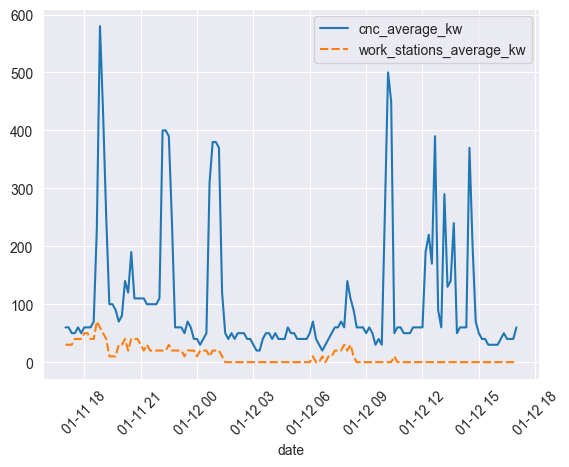

In [12]:
sns.set_style("darkgrid")

plt.xticks(rotation=45)
sns.lineplot(data=energy_consumption_df[['cnc_average_kw', 'work_stations_average_kw']]['2016-01-11 17:00':'2016-01-12 17:00'])

From the graph we can already see that there is a little correlation between the ```cnc_average_kw``` and ```work_station_average_kw``` but it needs to be checked with more detail.

We could analyze the data with a different sampling step to check if there is some sort of seasonal trend.

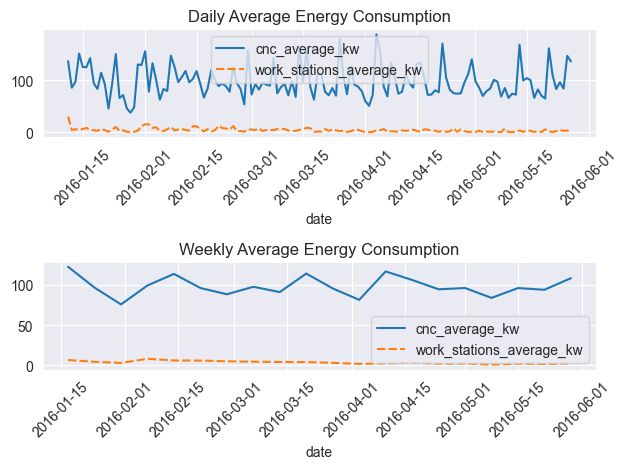

In [13]:
# Resample to daily frequency and compute mean for each day
daily_avg = energy_consumption_df[['cnc_average_kw', 'work_stations_average_kw']].resample('D').mean()

sns.set_style("darkgrid")

plt.subplot(2, 1, 1)  # 2 rows, 1 column, plot 1
plt.title('Daily Average Energy Consumption')
plt.xticks(rotation=45)
sns.lineplot(data=daily_avg)

# Resample to daily frequency and compute mean for each day
weekly_avg = energy_consumption_df[['cnc_average_kw', 'work_stations_average_kw']].resample('W').mean()

plt.subplot(2, 1, 2)  # 2 rows, 1 column, plot 2
plt.title('Weekly Average Energy Consumption')
plt.xticks(rotation=45)
sns.lineplot(data=weekly_avg)

plt.tight_layout()  # Adjust layout to prevent overlapping titles
plt.show()

From the graphs we can see that the data does not show any particular seasonal trend. This could have been expected considering that the objective of the assignment is to find a prediction based on the 1 to 4 hours previous data.

Let's try to plot daily trends by computing the mean values of all the days 10 minutes time intervals.

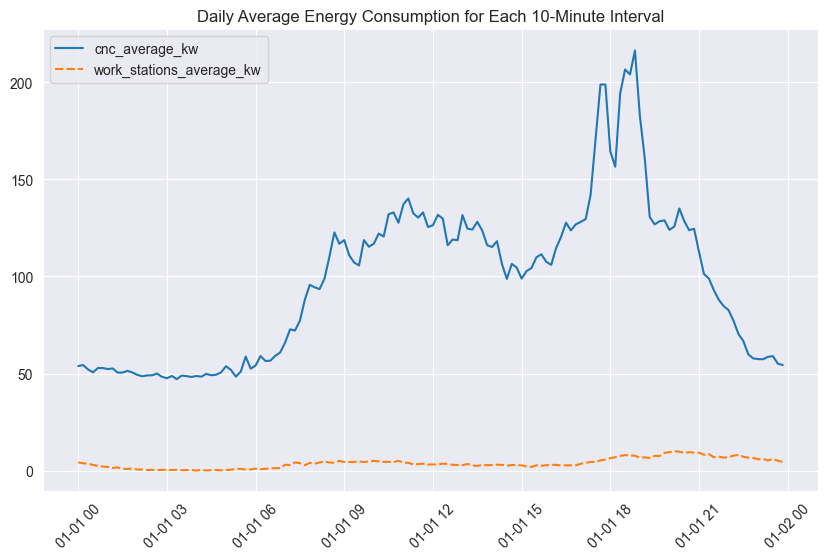

In [17]:
# Extract hour and minute from the timestamp
energy_consumption_df['hour'] = energy_consumption_df.index.hour
energy_consumption_df['minute'] = energy_consumption_df.index.minute

# Group by hour and minute, and compute the mean for each group
daily_avg_per_10min_df = energy_consumption_df.groupby(['hour', 'minute']).mean()

# Combine 'hour' and 'minute' indexes into a single datetime index
hour_minute_index = daily_avg_per_10min_df.index.get_level_values(0).astype(str) + ':' + daily_avg_per_10min_df.index.get_level_values(1).astype(str)
daily_avg_per_10min_df.index = pd.to_datetime(hour_minute_index, format='%H:%M')


# Plotting daily average energy consumption for each 10-minute interval
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_avg_per_10min_df[['cnc_average_kw', 'work_stations_average_kw']])
plt.title('Daily Average Energy Consumption for Each 10-Minute Interval')
plt.xticks(rotation=45)
plt.show()

This graph is much more meaningful telling us that on average the energy consumption starts to increase in the morning, likely at the same time as the working shift, with a peak in the late afternoon and then lowers down again in the evening. It is important to notice that the energy consumption never goes to zero meaning that on average some of the machines are always working.

#### Weather Data
In the next cells we'll analyze the environmental data in the datasets like temperature, humidity, windspeed and all the weather related data that might show some more sharp seasonal trends.

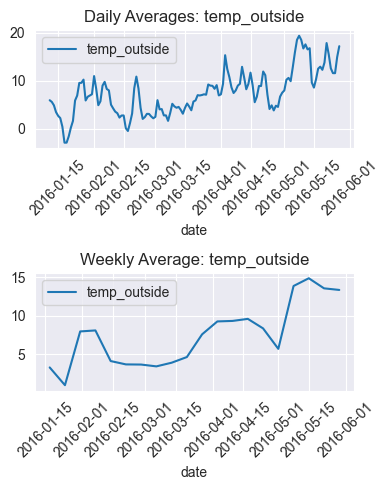

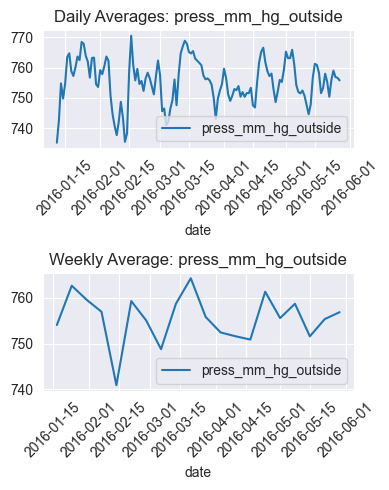

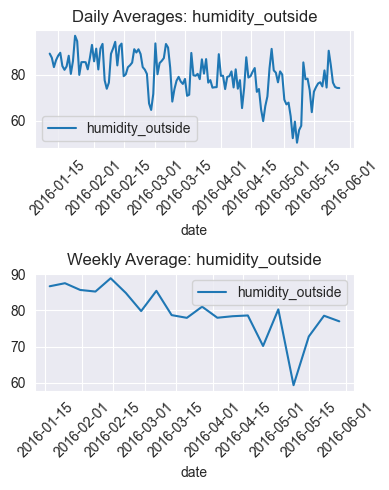

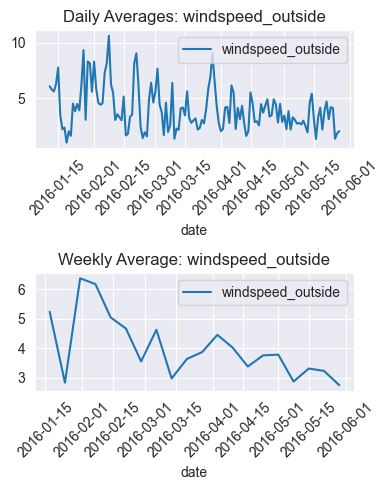

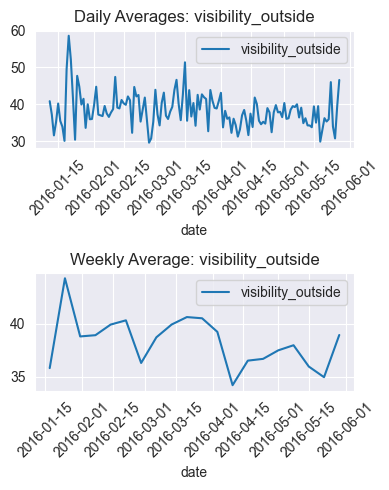

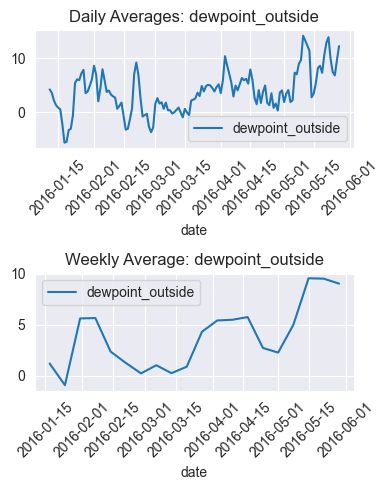

In [32]:
FIG_SIZE = (4, 5)

def plot_daily_weekly_avg(df: pd.DataFrame,
                          features: list[str],

                          ) -> None:
       # Resample to daily frequency and compute mean for each day
       daily_avg = df[features].resample('D').mean()

       sns.set_style("darkgrid")

       plt.figure(figsize=FIG_SIZE)

       plt.subplot(2, 1, 1)  # 2 rows, 1 column, plot 1
       plt.title(f'Daily Averages: {' '.join(features)}')
       plt.xticks(rotation=45)
       sns.lineplot(data=daily_avg)

       # Resample to daily frequency and compute mean for each day
       weekly_avg = df[features].resample('W').mean()

       plt.subplot(2, 1, 2)  # 2 rows, 1 column, plot 2
       plt.title(f'Weekly Average: {' '.join(features)}')
       plt.xticks(rotation=45)
       sns.lineplot(data=weekly_avg)

       plt.tight_layout()  # Adjust layout to prevent overlapping titles
       plt.show()


plot_daily_weekly_avg(df=energy_consumption_df, features=['temp_outside'])

plot_daily_weekly_avg(df=energy_consumption_df, features=['press_mm_hg_outside'])

plot_daily_weekly_avg(df=energy_consumption_df, features=['humidity_outside'])

plot_daily_weekly_avg(df=energy_consumption_df, features=['windspeed_outside'])

plot_daily_weekly_avg(df=energy_consumption_df, features=['visibility_outside'])

plot_daily_weekly_avg(df=energy_consumption_df, features=['dewpoint_outside'])


We can see that some features have a seasonal trends like temperature, humidity, dewpoint, and windspeed, while others have generally uniform distributed values across the considered time span.

In the next graph we'll analyze the temperature and humidity values of each CNC sensor.

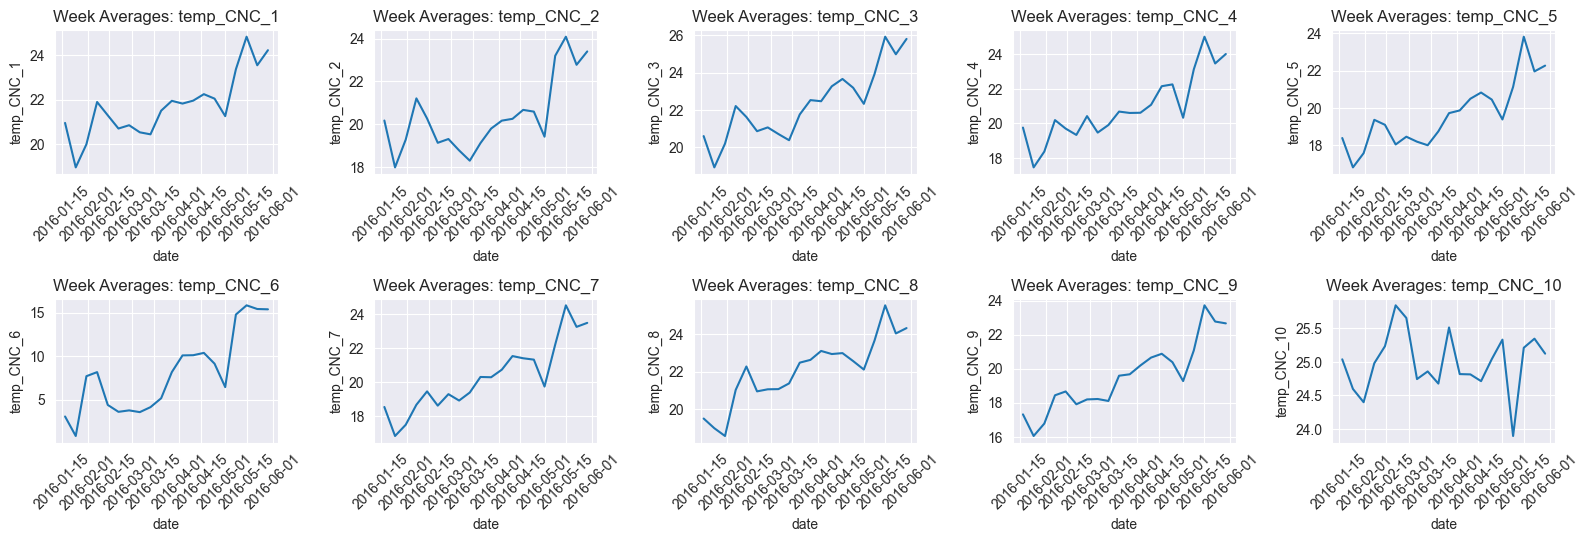

In [36]:
FIG_SIZE = (16, 10)

sns.set_style("darkgrid")

plt.figure(figsize=FIG_SIZE)

feature = 'temp_CNC_1'

# Resample to weekly frequency and compute mean for each week
week_avg = energy_consumption_df[feature].resample('W').mean()

plt.subplot(4, 5, 1)  
plt.title(f'Week Averages: {feature}')
plt.xticks(rotation=45)
sns.lineplot(data=week_avg)

feature = 'temp_CNC_2'

# Resample to weekly frequency and compute mean for each week
week_avg = energy_consumption_df[feature].resample('W').mean()

plt.subplot(4, 5, 2)  
plt.title(f'Week Averages: {feature}')
plt.xticks(rotation=45)
sns.lineplot(data=week_avg)

feature = 'temp_CNC_3'

# Resample to weekly frequency and compute mean for each week
week_avg = energy_consumption_df[feature].resample('W').mean()

plt.subplot(4, 5, 3)  
plt.title(f'Week Averages: {feature}')
plt.xticks(rotation=45)
sns.lineplot(data=week_avg)

feature = 'temp_CNC_4'

# Resample to weekly frequency and compute mean for each week
week_avg = energy_consumption_df[feature].resample('W').mean()

plt.subplot(4, 5, 4)  
plt.title(f'Week Averages: {feature}')
plt.xticks(rotation=45)
sns.lineplot(data=week_avg)

feature = 'temp_CNC_5'

# Resample to weekly frequency and compute mean for each week
week_avg = energy_consumption_df[feature].resample('W').mean()

plt.subplot(4, 5, 5)  
plt.title(f'Week Averages: {feature}')
plt.xticks(rotation=45)
sns.lineplot(data=week_avg)

feature = 'temp_CNC_6'

# Resample to weekly frequency and compute mean for each week
week_avg = energy_consumption_df[feature].resample('W').mean()

plt.subplot(4, 5, 6)  
plt.title(f'Week Averages: {feature}')
plt.xticks(rotation=45)
sns.lineplot(data=week_avg)

feature = 'temp_CNC_7'

# Resample to weekly frequency and compute mean for each week
week_avg = energy_consumption_df[feature].resample('W').mean()

plt.subplot(4, 5, 7)  
plt.title(f'Week Averages: {feature}')
plt.xticks(rotation=45)
sns.lineplot(data=week_avg)

feature = 'temp_CNC_8'

# Resample to weekly frequency and compute mean for each week
week_avg = energy_consumption_df[feature].resample('W').mean()

plt.subplot(4, 5, 8)  
plt.title(f'Week Averages: {feature}')
plt.xticks(rotation=45)
sns.lineplot(data=week_avg)

feature = 'temp_CNC_9'

# Resample to weekly frequency and compute mean for each week
week_avg = energy_consumption_df[feature].resample('W').mean()

plt.subplot(4, 5, 9)  
plt.title(f'Week Averages: {feature}')
plt.xticks(rotation=45)
sns.lineplot(data=week_avg)

feature = 'temp_CNC_10'

# Resample to weekly frequency and compute mean for each week
week_avg = energy_consumption_df[feature].resample('W').mean()

plt.subplot(4, 5, 10)  
plt.title(f'Week Averages: {feature}')
plt.xticks(rotation=45)
sns.lineplot(data=week_avg)

plt.tight_layout()  # Adjust layout to prevent overlapping titles

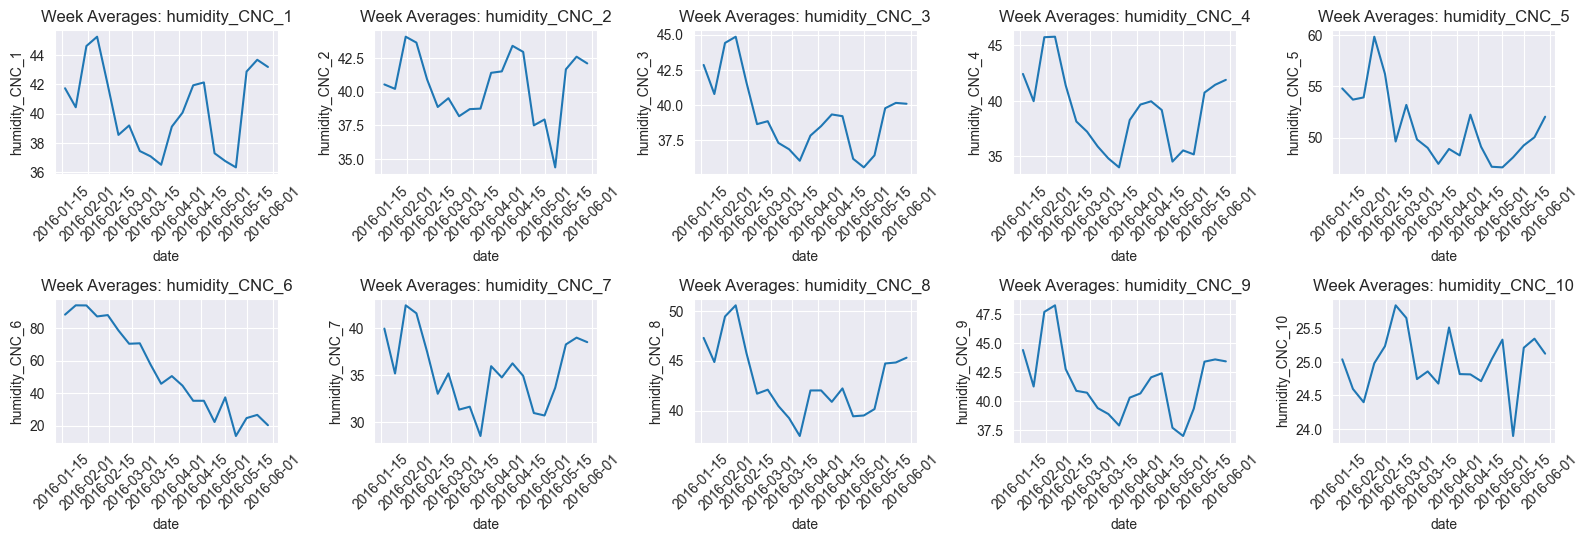

In [37]:
FIG_SIZE = (16, 10)

sns.set_style("darkgrid")

plt.figure(figsize=FIG_SIZE)

feature = 'humidity_CNC_1'

# Resample to weekly frequency and compute mean for each week
week_avg = energy_consumption_df[feature].resample('W').mean()

plt.subplot(4, 5, 1)  
plt.title(f'Week Averages: {feature}')
plt.xticks(rotation=45)
sns.lineplot(data=week_avg)

feature = 'humidity_CNC_2'

# Resample to weekly frequency and compute mean for each week
week_avg = energy_consumption_df[feature].resample('W').mean()

plt.subplot(4, 5, 2)  
plt.title(f'Week Averages: {feature}')
plt.xticks(rotation=45)
sns.lineplot(data=week_avg)

feature = 'humidity_CNC_3'

# Resample to weekly frequency and compute mean for each week
week_avg = energy_consumption_df[feature].resample('W').mean()

plt.subplot(4, 5, 3)  
plt.title(f'Week Averages: {feature}')
plt.xticks(rotation=45)
sns.lineplot(data=week_avg)

feature = 'humidity_CNC_4'

# Resample to weekly frequency and compute mean for each week
week_avg = energy_consumption_df[feature].resample('W').mean()

plt.subplot(4, 5, 4)  
plt.title(f'Week Averages: {feature}')
plt.xticks(rotation=45)
sns.lineplot(data=week_avg)

feature = 'humidity_CNC_5'

# Resample to weekly frequency and compute mean for each week
week_avg = energy_consumption_df[feature].resample('W').mean()

plt.subplot(4, 5, 5)  
plt.title(f'Week Averages: {feature}')
plt.xticks(rotation=45)
sns.lineplot(data=week_avg)

feature = 'humidity_CNC_6'

# Resample to weekly frequency and compute mean for each week
week_avg = energy_consumption_df[feature].resample('W').mean()

plt.subplot(4, 5, 6)  
plt.title(f'Week Averages: {feature}')
plt.xticks(rotation=45)
sns.lineplot(data=week_avg)

feature = 'humidity_CNC_7'

# Resample to weekly frequency and compute mean for each week
week_avg = energy_consumption_df[feature].resample('W').mean()

plt.subplot(4, 5, 7)  
plt.title(f'Week Averages: {feature}')
plt.xticks(rotation=45)
sns.lineplot(data=week_avg)

feature = 'humidity_CNC_8'

# Resample to weekly frequency and compute mean for each week
week_avg = energy_consumption_df[feature].resample('W').mean()

plt.subplot(4, 5, 8)  
plt.title(f'Week Averages: {feature}')
plt.xticks(rotation=45)
sns.lineplot(data=week_avg)

feature = 'humidity_CNC_9'

# Resample to weekly frequency and compute mean for each week
week_avg = energy_consumption_df[feature].resample('W').mean()

plt.subplot(4, 5, 9)  
plt.title(f'Week Averages: {feature}')
plt.xticks(rotation=45)
sns.lineplot(data=week_avg)

feature = 'humidity_CNC_10'

# Resample to weekly frequency and compute mean for each week
week_avg = energy_consumption_df[feature].resample('W').mean()

plt.subplot(4, 5, 10)  
plt.title(f'Week Averages: {feature}')
plt.xticks(rotation=45)
sns.lineplot(data=week_avg)

plt.tight_layout()  # Adjust layout to prevent overlapping titles

CNC temperature values do not show particular trends except for the standard seasonal temperature increase, excluding sensor 10 that has an overall steady temperature environment. On the other hand humidity values have quite different trends among different sensor, in the general picture the humidity always decreases with some exceptions like sensor 1 that reaches high values also in the final weeks and sensor 10 that has a steady trend like for the temperature.

From these observation we could speculate that sensor 10 is in a whole different place with respect to the other ones, mmaybe somewhere with a controlled temperature. Then, the CNC sensor from 1 to 9 could be located in the same space but in areas with different humidity levels that might be generated by the equipment used.

Some of this features could be reduced into a unique features to lower the dimension number when trying to predict the energy consumption and help the model generalize, however the small advantage introduced by reducing the dimensions might not be worth the effort so we will leave it for further studies.

### Data Normalization

In the next cell we will normalize the data to have zero mean and unitary standard deviation. This should help any model we're using during training.

In [38]:
energy_consumption_df = (energy_consumption_df - energy_consumption_df.mean()) / energy_consumption_df.std()

### Dataset Preparation

In [ ]:
# https://stackoverflow.com/questions/38250710/how-to-split-data-into-3-sets-train-validation-and-test
train_size = 0.7
val_size = 0.2
test_size = 0.1

train, val, test = np.split(energy_consumption_df.sample(frac=1, random_state=SEED), 
                            [int(train_size * len(energy_consumption_df)), int((train_size + val_size) * len(energy_consumption_df))])
print(f'train size: {train.shape[0]}, val size: {val.shape[0]}, test size: {test.shape[0]}')

### Prediction

In the next paragraphs we will try to define a model to predict the energy consumption.

#### ARIMA

